In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
df = pd.read_csv("Titanic-Dataset.csv")

In [16]:
print("First 5 rows:\n",df.head())
print("\nDataset Info:")
df.info()
print("\nNull Values:\n",df.isnull().sum())

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [38]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [39]:
df.fillna({'Cabin': 'Unknown'}, inplace=True)

In [40]:
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

In [41]:
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [42]:
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

In [51]:
df.drop([col for col in ['Name', 'Ticket', 'Cabin'] if col in df.columns], axis=1, inplace=True)

In [52]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [53]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

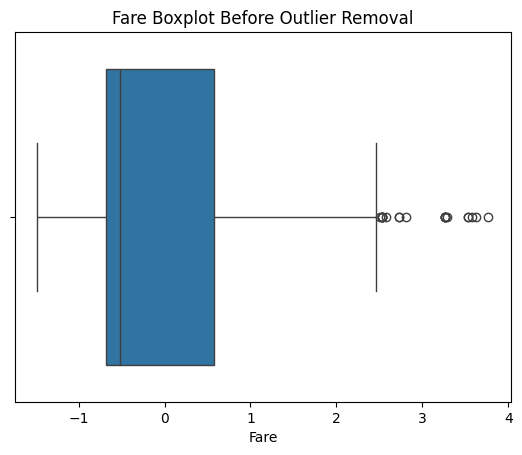

In [54]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot Before Outlier Removal")
plt.show()

In [55]:
df = remove_outliers(df, 'Fare')

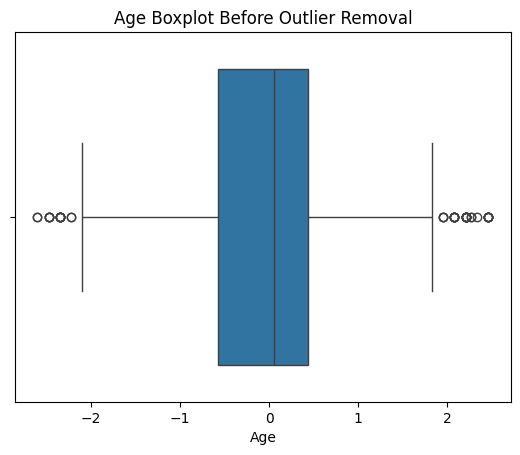

In [56]:
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot Before Outlier Removal")
plt.show()

In [57]:
df = remove_outliers(df, 'Age')

In [58]:
print("\nDataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (566, 9)


In [59]:
df.to_csv("Cleaned_Titanic.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Titanic.csv'")

Cleaned dataset saved as 'Cleaned_Titanic.csv'
